In [24]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

## Introduction
First we will show the basics with an easy example to get the data for students in Informatique, 2016-2017, Bachelor 1

In [56]:
'''
We define several parameters and key-value pairs that will be needed to make the requests.
To access different data from ISA we can simply change the values "vzz".
All these urls and parameters' names had been obtained thanks to Postman Interceptor.
'''
base_url = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.filter?ww_i_reportModel=133685247'
#base_url2 = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.filter?ww_b_list=1&ww_i_reportmodel=133685247&ww_c_langue=&ww_x_GPS=-1&ww_i_reportModelXsl=133685270'
base_url2 = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.bhtml?ww_x_GPS=-1&' +\
    'ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270'
#base_url2_ending = '&zz_x_HIVERETE=&ww_x_HIVERETE=null&dummy=ok'
base_url2_ending = '&ww_x_HIVERETE=null'
#Some of the key-value relations have already been embebed in the url!

kzz = ['zz_x_UNITE_ACAD','zz_x_PERIODE_ACAD','zz_x_PERIODE_PEDAGO'] #keys
vzz = ['Informatique','2016-2017','Bachelor semestre 1'] #parameter changes to vzz
kww = ['ww_x_UNITE_ACAD','ww_x_PERIODE_ACAD','ww_x_PERIODE_PEDAGO'] #more keys
#vww = list() #vww gets autofilled according to vzz, defined later


#Finally we check that ISA is up and running, looking for 200 OK
r = requests.get(base_url)
r.status_code

200

In [9]:
# We can print of our first request with "r.content" or beautify it with Soup
soup = BeautifulSoup(r.content,"lxml")
print(soup.prettify()) #Prints the html for the main portal.

<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 </head>
 <body>
  <div>
  </div>
  <title>
  </title>
  <script src="GEDPUBLICREPORTS.txt?ww_x_path=Gestac.Base.Palette_js&amp;ww_c_langue=fr" type="text/javascript">
  </script>
  <link href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.Style" rel="stylesheet" type="text/css"/>
  <link href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.StyleNavigator" rel="stylesheet" type="text/css"/>
  <div class="filtres">
   <form action="!GEDPUBLICREPORTS.filter" method="GET" name="f">
    <input name="ww_b_list" type="hidden" value="1"/>
    <input name="ww_i_reportmodel" type="hidden" value="133685247"/>
    <input name="ww_c_langue" type="hidden" value=""/>
    <h1 id="titre">
     Liste des étudiants inscrits par semestre
    </h1>
    <table border="0" id="format">
     <tr>
      <th>
       Format:
      </th>
     </tr>
     <tr>
      <td>
       <input checked="" name="ww_i_reportModelXsl" type="r

In [13]:
'''
Here we are going to look for the numeric values asociated to vww.
To do that we search inside the html, inside the "option" tag, for the string corresponding to our
    selecting criterias "vzz".
The corresponding number for vww is the value of this tag.
'''

##To have a look at what we are talking about we can do:
#options = soup.find_all("option")
#print(options)

#Now we fill vww
options = soup.find_all("option")
vww = list() #Reinitialization to make sure it's empty
for vzz_temp in vzz:
    for option in options:
        if vzz_temp in option:
            vww_temp_str=option
            vww_temp = re.search('value="(.+?)">', str(vww_temp_str)).group(1) #this is necessary to clean the string
            vww.append(vww_temp)
print(vww)

['249847', '355925344', '249108']


In [27]:
# Now we can finally make our request to get the table:

final_url = base_url2 + '&' + kww[0] + '=' + vww[0] + '&' + kww[1] + '=' + vww[1] + '&' + kww[2] + '=' + vww[2] + base_url2_ending
print(final_url) #this url can also be access manually by clicking on the output

table = requests.get(final_url)
soup1 = BeautifulSoup(table.text,'html.parser')

def make_dataframe(soup1): #this function helps transforming the soup object into a dataframe
    rows = soup1.find_all('tr')
    data = []
    h = []
    for row in rows:
        header = row.find_all('th')
        header = [ele.text.strip() for ele in header]
        h.append([ele for ele in header] )
    h[1].append('Remarks') # <- this would add an extra blank column
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols ]) 
    df = pd.DataFrame(data[2:],columns = h[1] )
    return df

df = make_dataframe(soup1)
df

http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.bhtml?ww_x_GPS=-1&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=355925344&ww_x_PERIODE_PEDAGO=249108&ww_x_HIVERETE=null


,Civilité,Nom Prénom,Orientation Bachelor,Orientation Master,Spécialisation,Filière opt.,Mineur,Statut,Type Echange,Ecole Echange,No Sciper,Remarks
0,Monsieur,Abbey Alexandre,,,,,,Présent,,,235688,
1,Monsieur,Ahn Seongho,,,,,,Présent,,,274015,
2,Madame,Alemanno Sara,,,,,,Présent,,,268410,
3,Monsieur,Althaus Luca,,,,,,Présent,,,271464,
4,Monsieur,Assi Karim,,,,,,Présent,,,274518,
5,Monsieur,Badoux Luc-Antoine,,,,,,Présent,,,249613,
6,Monsieur,Bagnoud Jérôme,,,,,,Présent,,,262214,
7,Monsieur,Barbaras Yann Quentin,,,,,,Présent,,,262239,
8,Monsieur,Barras Luca,,,,,,Présent,,,257916,
9,Madame,Barsi Clémence Marie Sabine,,,,,,Présent,,,271508,


In [41]:
#And let's actually include some valuable information and get rid of the blanks
df1 = df[df.columns[[0,1,10]]]
for idx in range(len(kzz)):
    df1[kzz[idx]]=vzz[idx]
df1

C:\Users\dunay\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Civilité,Nom Prénom,No Sciper,zz_x_UNITE_ACAD,zz_x_PERIODE_ACAD,zz_x_PERIODE_PEDAGO
0,Monsieur,Abbey Alexandre,235688,Informatique,2016-2017,Bachelor semestre 1
1,Monsieur,Ahn Seongho,274015,Informatique,2016-2017,Bachelor semestre 1
2,Madame,Alemanno Sara,268410,Informatique,2016-2017,Bachelor semestre 1
3,Monsieur,Althaus Luca,271464,Informatique,2016-2017,Bachelor semestre 1
4,Monsieur,Assi Karim,274518,Informatique,2016-2017,Bachelor semestre 1
5,Monsieur,Badoux Luc-Antoine,249613,Informatique,2016-2017,Bachelor semestre 1
6,Monsieur,Bagnoud Jérôme,262214,Informatique,2016-2017,Bachelor semestre 1
7,Monsieur,Barbaras Yann Quentin,262239,Informatique,2016-2017,Bachelor semestre 1
8,Monsieur,Barras Luca,257916,Informatique,2016-2017,Bachelor semestre 1
9,Madame,Barsi Clémence Marie Sabine,271508,Informatique,2016-2017,Bachelor semestre 1


## Formalization

Now that we have seen how to get the data for an specific query, we'll formalize it as fuctions and fetch all the data we need in a single table.

In [235]:
def fillvww(soup,vzz):
    options = soup.find_all("option")
    vww = list() #Reinitialization to make sure it's empty
    for vzz_temp in vzz:
        for option in options:
            if vzz_temp in option:
                vww_temp_str=option
                vww_temp = re.search('value="(.+?)">', str(vww_temp_str)).group(1) #this is necessary to clean the string
                vww.append(vww_temp)
    return vww

def make_dataframe_b(soup1,kzz,vzz): #this function helps transforming the soup object into a dataframe for bachelors
    rows = soup1.find_all('tr')
    data = []
    h = []
    for row in rows:
        header = row.find_all('th')
        header = [ele.text.strip() for ele in header]
        h.append([ele for ele in header] )
    h[1].append('Remarks') # <- this would add an extra blank column
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols ]) 
    df = pd.DataFrame(data[2:],columns = h[1] )
    df1 = df[df.columns[[0,1,10]]] #For bachelor we only keep Civilité , Nom Prénom and No Sciper
    for idx in range(len(kzz)): #And we add key-value pairs
        df1[kzz[idx]]=vzz[idx]
    return df1

def make_dataframe_m(soup1,kzz,vzz): #this function helps transforming the soup object into a dataframe for masters
    rows = soup1.find_all('tr')
    data = []
    h = []
    for row in rows:
        header = row.find_all('th')
        header = [ele.text.strip() for ele in header]
        h.append([ele for ele in header] )
    h[1].append('Remarks') # <- this would add an extra blank column
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols ]) 
    df = pd.DataFrame(data[2:],columns = h[1] )
    df1 = df[df.columns[[0,1,4,6,10]]] #For masters we also keep Mineur and Specialization
    for idx in range(len(kzz)): #And we add key-value pairs
        df1[kzz[idx]]=vzz[idx]
    return df1

base_url = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.filter?ww_i_reportModel=133685247'
base_url2 = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.bhtml?ww_x_GPS=-1&' +\
    'ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270'
base_url2_ending = '&ww_x_HIVERETE=null'

kzz = ['zz_x_UNITE_ACAD','zz_x_PERIODE_ACAD','zz_x_PERIODE_PEDAGO'] #keys
vzz = ['Informatique','2016-2017','Bachelor semestre 1'] #parameter changes to vzz
kww = ['ww_x_UNITE_ACAD','ww_x_PERIODE_ACAD','ww_x_PERIODE_PEDAGO'] #more keys

years = ['2007-2008','2008-2009','2009-2010','2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017']
semesters_b = ['Bachelor semestre 1', 'Bachelor semestre 2', 'Bachelor semestre 3', 'Bachelor semestre 4', 'Bachelor semestre 5', 'Bachelor semestre 6']
semesters_m = ['Master semestre 1', 'Master semestre 2', 'Master semestre 3', 'Projet Master automne', 'Projet Master printemps']

r = requests.get(base_url)
soup = BeautifulSoup(r.content,"lxml")

## Exercise 1
#### Problem:
Obtain all the data for the Bachelor students, starting from 2007. Keep only the students for which you have an entry for both Bachelor semestre 1 and Bachelor semestre 6. Compute how many months it took each student to go from the first to the sixth semester. Partition the data between male and female students, and compute the average -- is the difference in average statistically significant?

#### Procedure:
We fetch every combination of year/semester and construct a big dataframe with all the valuable info.
Then, we play with the dataframe to obtain desired results. Finally compute the appropiate statistical test.

In [ ]:
#Get everything for Bachelor
df_b = pd.DataFrame()
for year in years:
    vzz[1] = year
    for semester in semesters_b:
        vzz[2] = semester
        vww = fillvww(soup,vzz)
        final_url = base_url2 + '&' + kww[0] + '=' + vww[0] + '&' + kww[1] + '=' + vww[1] + '&' + kww[2] + '=' + vww[2] + base_url2_ending
        table = requests.get(final_url)
        print(table.status_code)
        soup1 = BeautifulSoup(table.text,'html.parser')
        df = make_dataframe_b(soup1,kzz,vzz)
        df_b = pd.concat([df_b,df],axis=0)
        
df_b.head()

In [66]:
# We can see that it is a big table indeed
df_b.shape

(5815, 6)

In [81]:
# Let's save it
df_b.to_pickle('Dunai_Big_df_b')
# To read:
# df_b = pd.read_pickle('Dunai_Big_df_b')

In [192]:
# Keep only the students for which you have an entry for both Bachelor semestre 1 and Bachelor semestre 6
aux = df_b.set_index(['zz_x_PERIODE_PEDAGO'])
semestre1_idx = aux.loc['Bachelor semestre 1']['No Sciper'].values.tolist()
semestre6_idx = aux.loc['Bachelor semestre 6']['No Sciper'].values.tolist()
semestre16_idx = set(semestre1_idx).intersection(semestre6_idx)
len(semestre16_idx) #Number of students that took both 1st and 6th semester

397

We find that there are 397 different students that have taken bachelor semester 1 and 6

In [215]:
aux = df_b.set_index('No Sciper')
bachelor_clean = aux.loc[semestre16_idx] #we select only students that took both semesters
no_index = bachelor_clean.reset_index()
#and we calculate the durarion 
duration_months = no_index[['zz_x_PERIODE_PEDAGO']].groupby(no_index['No Sciper']).apply(lambda x: x.count()*6)
#quick rename
duration_months1 = duration_months.rename(index=str, columns={"zz_x_PERIODE_PEDAGO": "Duration"}) 
#concat to unique data with all the data
bachelor_unique = no_index.drop_duplicates(subset='No Sciper').set_index('No Sciper')
bachelor_data_duration = pd.concat([bachelor_unique,duration_months1],axis=1)
bachelor_data_duration.index.name = 'No Sciper' #A correction due to concat
bachelor_data_duration.head()

,Civilité,Nom Prénom,zz_x_UNITE_ACAD,zz_x_PERIODE_ACAD,zz_x_PERIODE_PEDAGO,Duration
No Sciper,,,,,,
147008,Monsieur,Good Xavier,Informatique,2008-2009,Bachelor semestre 1,36
169569,Monsieur,Arévalo Christian,Informatique,2007-2008,Bachelor semestre 1,36
169731,Monsieur,Knecht Mathieu,Informatique,2007-2008,Bachelor semestre 1,48
169795,Monsieur,Scheiben Pascal,Informatique,2007-2008,Bachelor semestre 1,54
171195,Monsieur,Richter Arnaud,Informatique,2007-2008,Bachelor semestre 1,36


In [216]:
bachelor_data_duration.groupby('Civilité').describe()

Duration
Civilité                  
Madame   count   29.000000
         mean    40.758621
         std      8.078433
         min     36.000000
         25%     36.000000
         50%     36.000000
         75%     48.000000
         max     66.000000
Monsieur count  368.000000
         mean    42.635870
         std      9.221348
         min     24.000000
         25%     36.000000
         50%     36.000000
         75%     48.000000
         max     72.000000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6D59CDEB8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001C6D5A197F0>], dtype=object)

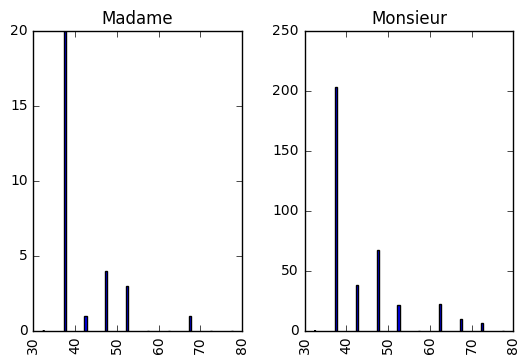

In [223]:
%matplotlib inline
import matplotlib.pyplot as plt
bachelor_data_duration['Duration'].hist(by=bachelor_data_duration['Civilité'],rwidth=0.1,range=(30,80),align='mid')

In [225]:
#Performing the statistical test:

import scipy.stats as stats

x = bachelor_data_duration[bachelor_data_duration['Civilité']=='Monsieur']['Duration']
y = bachelor_data_duration[bachelor_data_duration['Civilité']=='Madame']['Duration']

stats.ranksums(x, y)

RanksumsResult(statistic=1.0849817303469806, pvalue=0.2779297470373463)

## Exercise 2
#### Problem:
Perform a similar operation to what described above, this time for Master students. Notice that this data is more tricky, as there are many missing records in the IS-Academia database. Therefore, try to guess how much time a master student spent at EPFL by at least checking the distance in months between Master semestre 1 and Master semestre 2. If the Mineur field is not empty, the student should also appear registered in Master semestre 3. Last but not the least, don't forget to check if the student has an entry also in the Projet Master tables. Once you can handle well this data, compute the "average stay at EPFL" for master students. Now extract all the students with a Spécialisation and compute the "average stay" per each category of that attribute -- compared to the general average, can you find any specialization for which the difference in average is statistically significant?

#### Procedure:
We fetch every combination of year/semester and construct a big dataframe with all the valuable info.
Then, we play with the dataframe to obtain desired results.

In [239]:
#Get everything for Master. Note that we dont get stage printemps because we are asked about time at EPFL.
df_m = pd.DataFrame()
for year in years:
    vzz[1] = year
    for semester in semesters_m:
        if (semester == 'Projet Master printemps') and (year == '2016-2017'):
            df_m.to_pickle('Dunai_Big_df_m')
            break #This is a fix for the fact that in this last year people had still not been able to register for master project in spring.
        vzz[2] = semester
        vww = fillvww(soup,vzz)
        final_url = base_url2 + '&' + kww[0] + '=' + vww[0] + '&' + kww[1] + '=' + vww[1] + '&' + kww[2] + '=' + vww[2] + base_url2_ending
        table = requests.get(final_url)
        print(table.status_code)
        soup1 = BeautifulSoup(table.text,'html.parser')
        df = make_dataframe_m(soup1,kzz,vzz)
        df_m = pd.concat([df_m,df],axis=0)
        
df_m.head()

200


C:\Users\dunay\Anaconda3\lib\site-packages\ipykernel\__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


IndexError: list index out of range

In [ ]:
# We can see that it is a big table indeed
df_m.shape

In [ ]:
# Let's save it
df_m.to_pickle('Dunai_Big_df_m')
# To read:
# df_m = pd.read_pickle('Dunai_Big_df_m')